In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [3]:
#Loading dataset
wine_data = pd.read_csv("C:/Users/vikas/Downloads/WineQT.csv")

In [4]:
print(wine_data.describe())  


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [5]:
print(wine_data.info())      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [6]:
print(wine_data['quality'].value_counts()) 

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


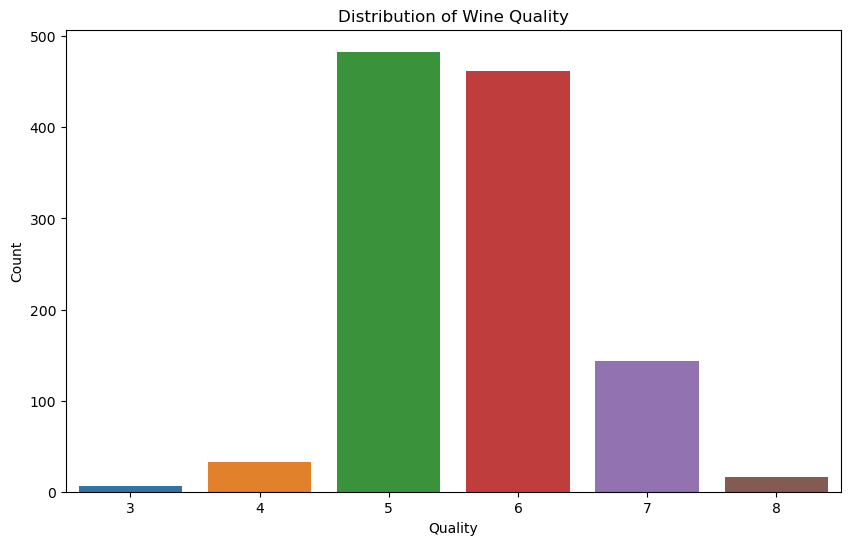

In [7]:
#wine quality distrubution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [8]:
# Spliting the dataset into features (X) and target (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#ANN modelarchitecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'), 
     keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),     
    keras.layers.Dense(10, activation='softmax')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 45130 (176.29 KB)
Trainable params: 45130 (176.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
#training the model
history=model.fit(X_train, y_train, epochs=200, batch_size=64, )

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 2.2818 - accuracy: 0.0810
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 2.1560 - accuracy: 0.3359
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 2.0470 - accuracy: 0.5033
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 1.9417 - accuracy: 0.5405
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.8323 - accuracy: 0.5569
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 1.7160 - accuracy: 0.5689
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 1.6018 - accuracy: 0.5744
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 1.4918 - accuracy: 0.5777
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 1.3966 - accuracy: 0.5755
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 1.3180 - accuracy: 0.5777
Epoch 11/

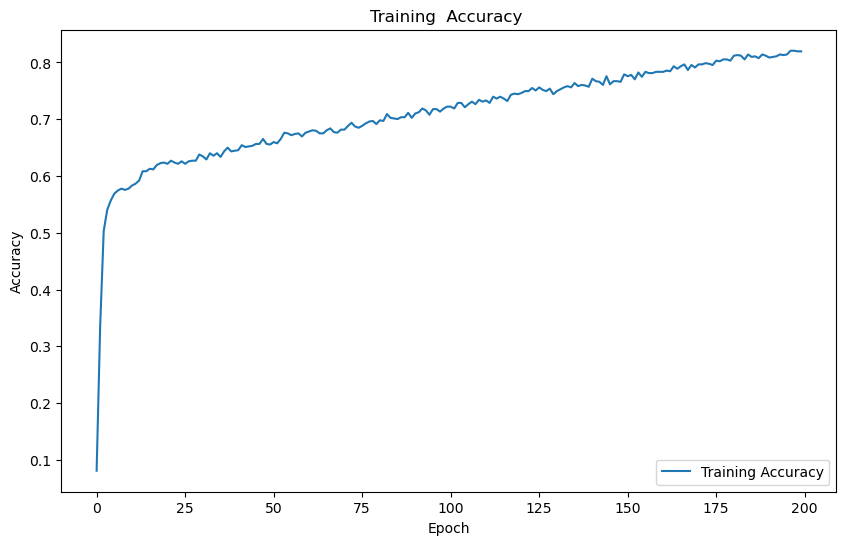

In [13]:
#vizualizing thr training accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training  Accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [14]:
#testing accuracy 
testloss,test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.9459 - accuracy: 0.6594
Test Accuracy: 0.6593886613845825


In [15]:
#Classification report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels, zero_division=0))

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.71      0.74      0.72        96
           6       0.65      0.67      0.66        99
           7       0.56      0.54      0.55        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.32      0.32      0.32       229
weighted avg       0.64      0.66      0.65       229



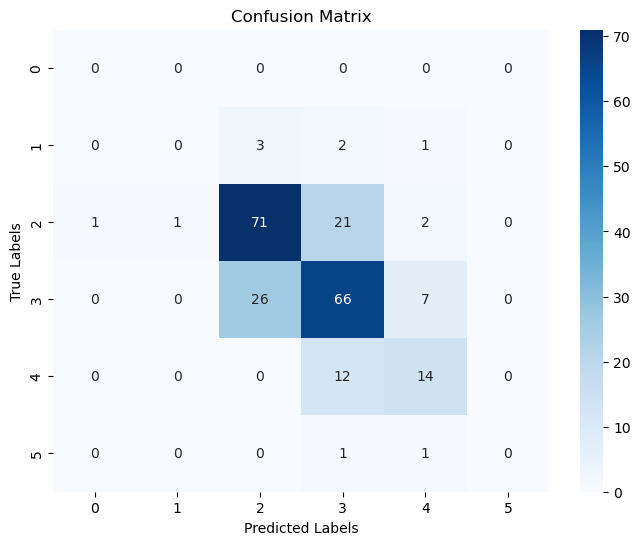

In [16]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()